# Index   

 
[Exploratory Data Analysis](#ExploratoryDataAnalysis)

[Analyzing customer purchasing habits](#A00001)

[Importing libraries](##Importing-libraries)

[Reading the data set](###Reading-the-data-set)

[Model Screening](#Model-Screening)

[Reading the data set](###Reading-the-data-set)

[Reading the data set](###Reading-the-data-set)

# Exploratory-Data-Analysis
<a id="A00001"></a>

### Importing libraries

In [64]:
#data exploration&manipulation
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
import seaborn as sns

import datetime as dt
import os
import matplotlib.pyplot as plt

#ML Models search and optimisation
from pycaret.classification import * 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#from sklearn.model_selection import GridSearchCV
#from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix
import optuna
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

#Neural Networks
import torch
import torch.nn as nn
import torch.optim as optim



%matplotlib inline

### Reading the data set

In [65]:
   
# Import space_X_train.csv
import pandas as pd
space_X_train = pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\initial_docs\space_X_train.csv')

In [66]:
space_X_train.head()


,Unnamed: 0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [67]:
space_X_train.drop('Unnamed: 0',axis = 1 , inplace=True) #Drop unnecesary column

In [68]:
space_X_train.isnull().sum()

sensor_1    0
sensor_2    0
sensor_3    0
sensor_4    0
sensor_5    0
sensor_6    0
target      0
dtype: int64

In [69]:
space_X_train.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


Values of sensors are very similar (range from -0.433 to 6.700). There is no null values to be cleaned.

In [70]:
y = space_X_train.target

Text(0, 0.5, '# of instances')

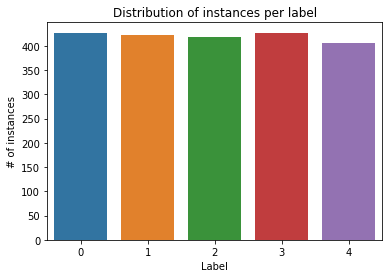

In [71]:
#Label distribution checking
counter = Counter(y)
dist_plot=sns.barplot(x=list(counter.keys()), y=list(counter.values()))
dist_plot.set_title('Distribution of instances per label')
dist_plot.set_xlabel('Label')
dist_plot.set_ylabel('# of instances')

In [72]:
ratio_labels= [x/len(y) for x in list(counter.values())]
ratio_labels

[0.19285714285714287,
 0.20333333333333334,
 0.20142857142857143,
 0.20285714285714285,
 0.19952380952380952]

Distribution of samples are very similiar each other, there is no minoritay/majotary class in the label column.

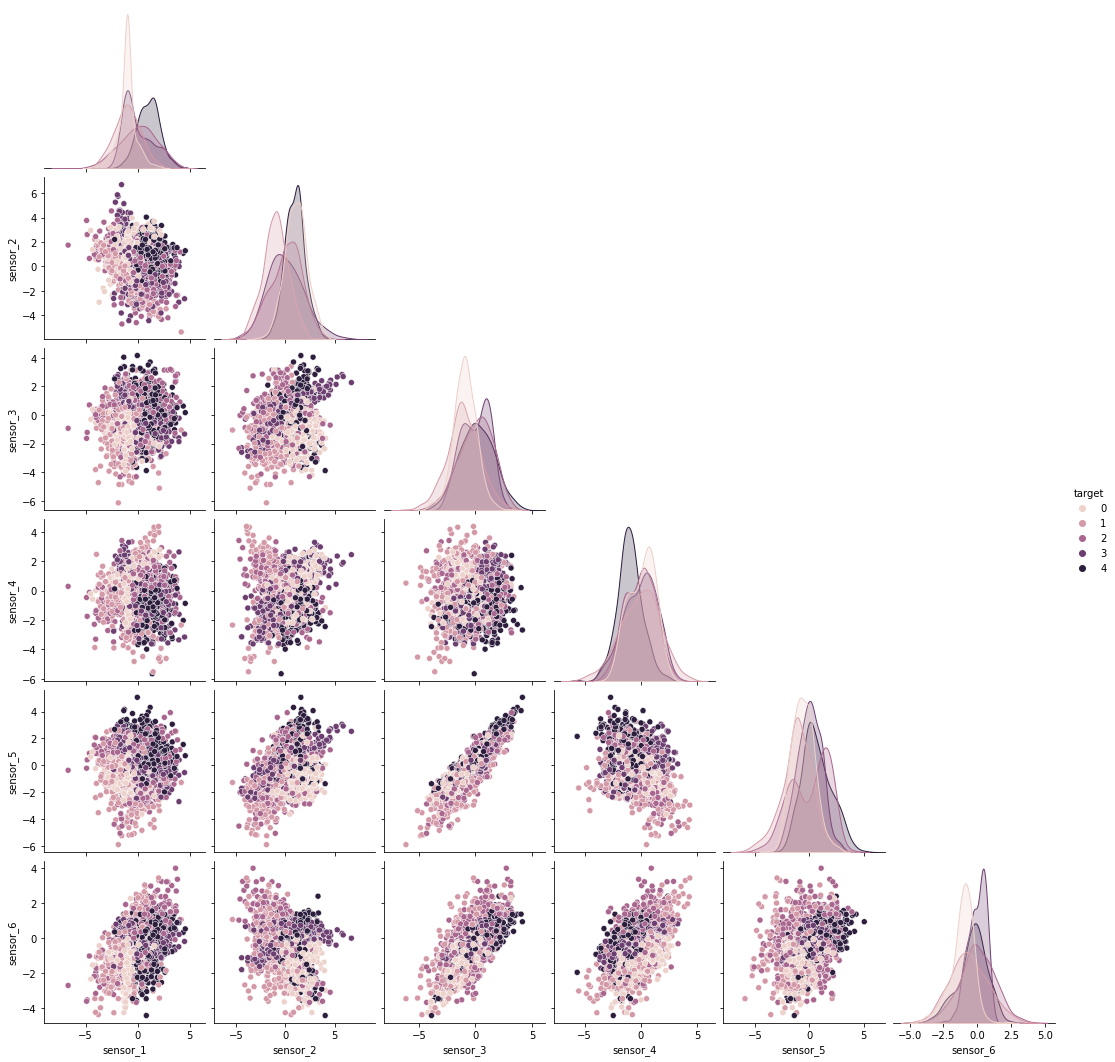

In [73]:
sns.pairplot(space_X_train, corner=True,hue='target')

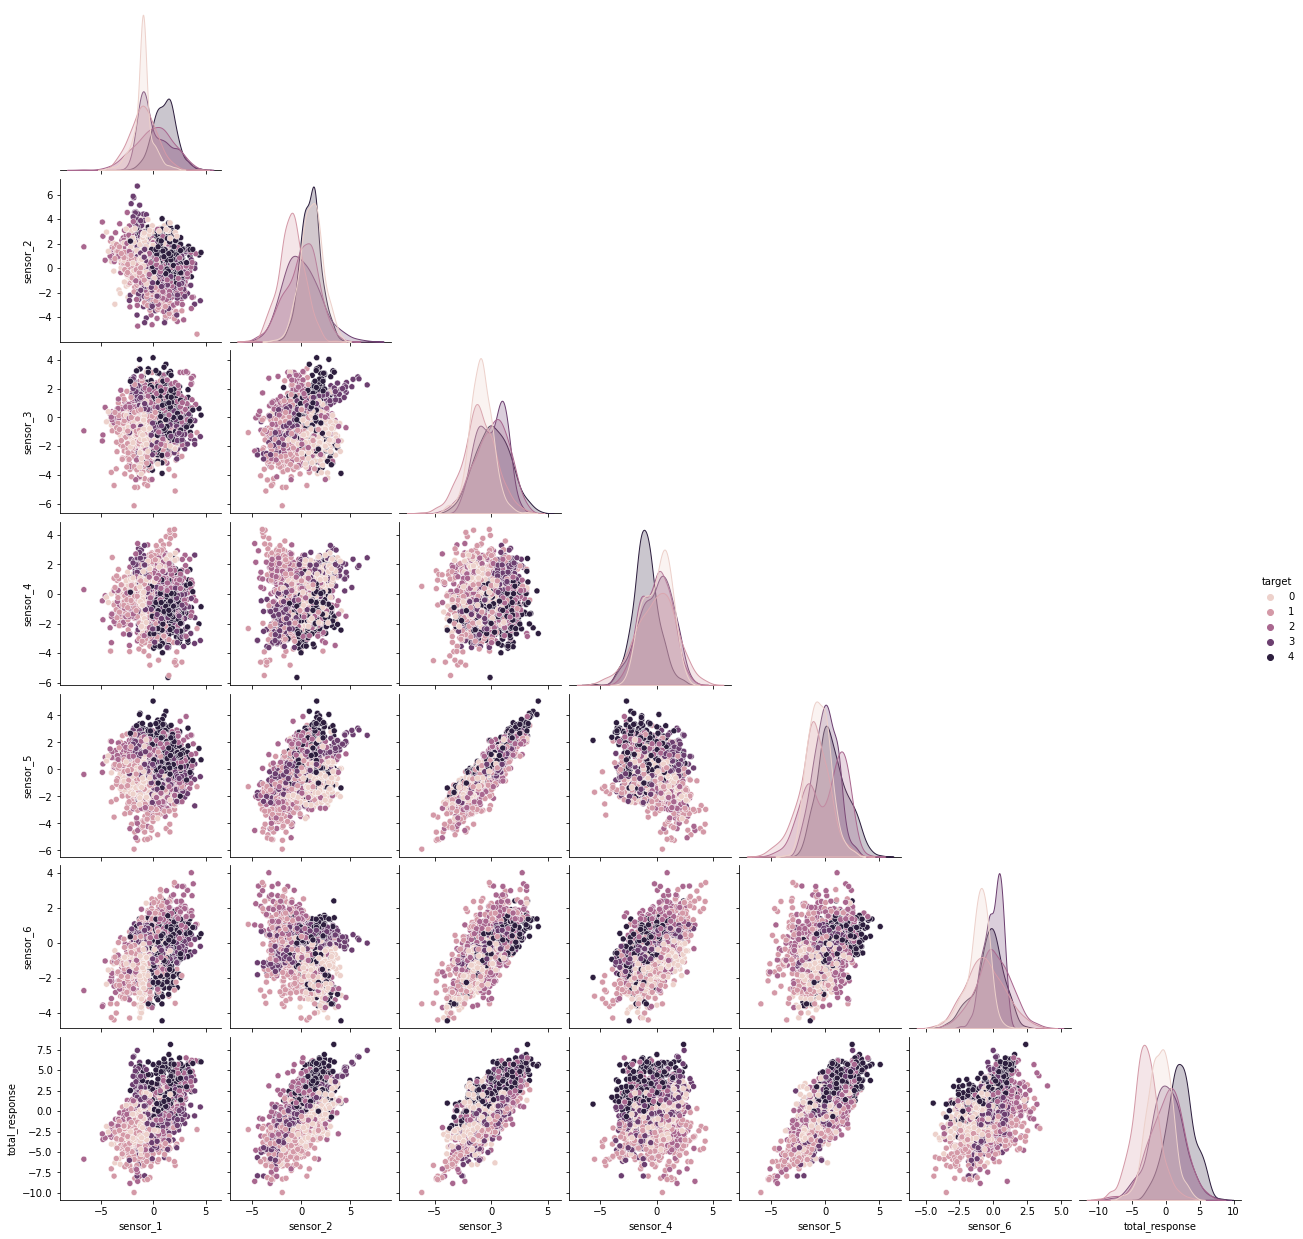

In [74]:
space_X_train_extra2= space_X_train.copy()
space_X_train_extra2['total_response']=space_X_train['sensor_1']+space_X_train['sensor_2']+space_X_train['sensor_3']
sns.pairplot(space_X_train_extra2, corner=True, hue='target')

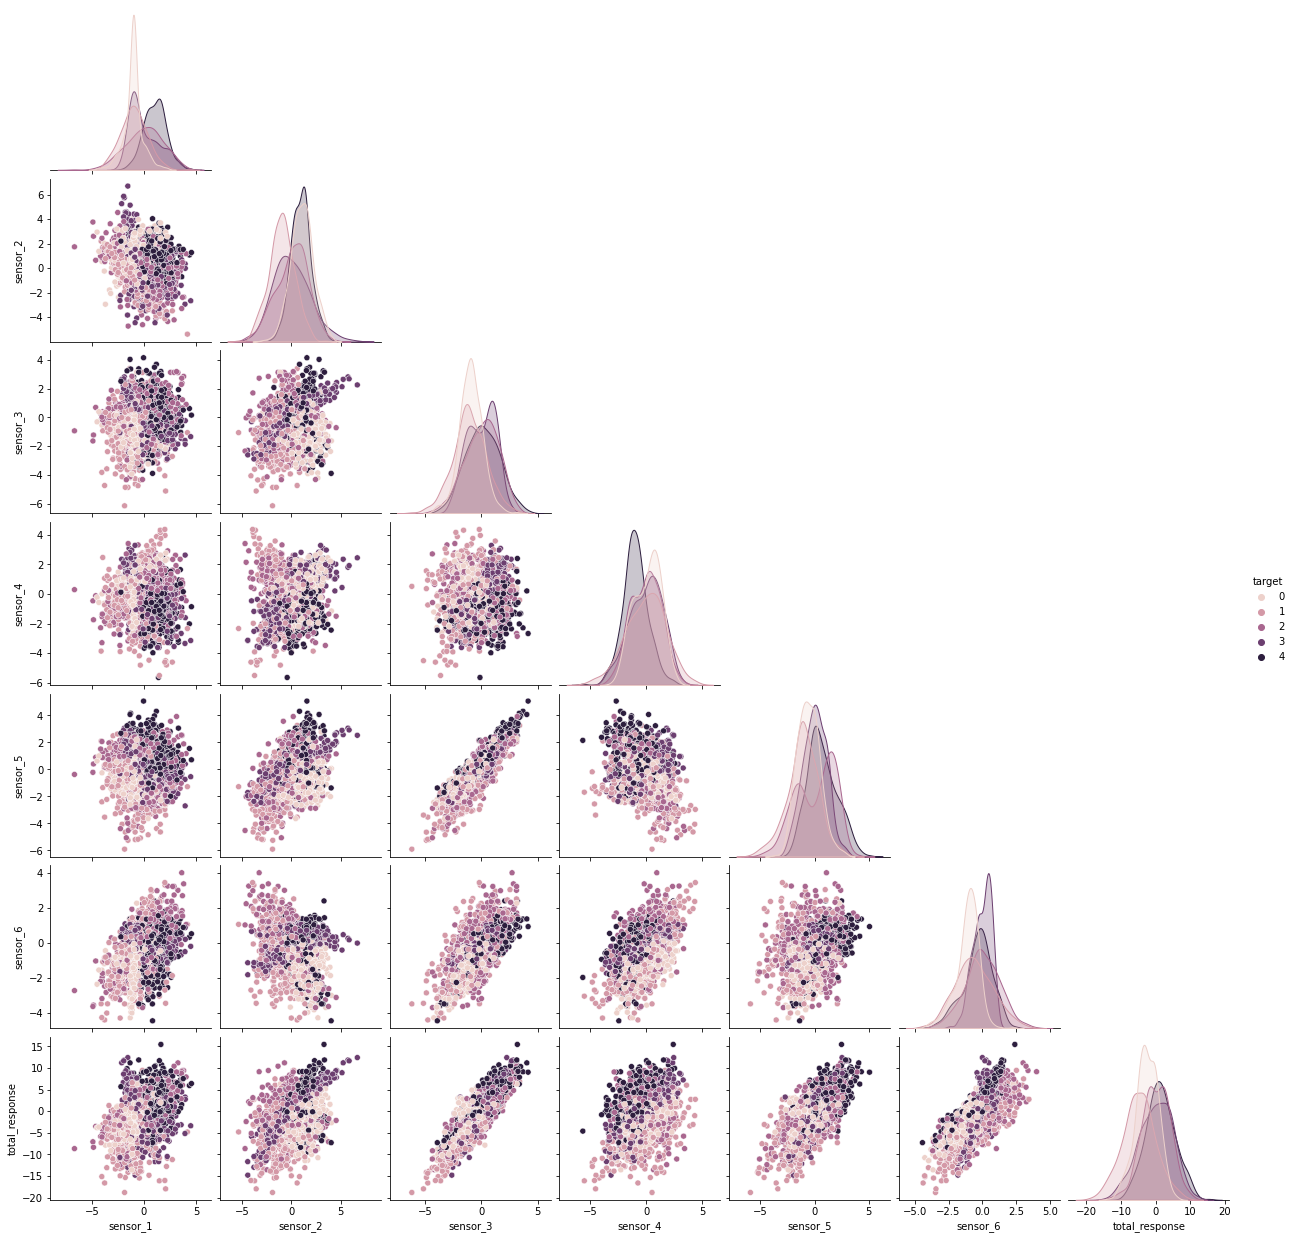

In [75]:
space_X_train_extra= space_X_train.copy()
space_X_train_extra['total_response']=space_X_train['sensor_1']+space_X_train['sensor_2']+space_X_train['sensor_3']+space_X_train['sensor_4']+space_X_train['sensor_5']+space_X_train['sensor_6']
sns.pairplot(space_X_train_extra, corner=True, hue='target')

<AxesSubplot:>

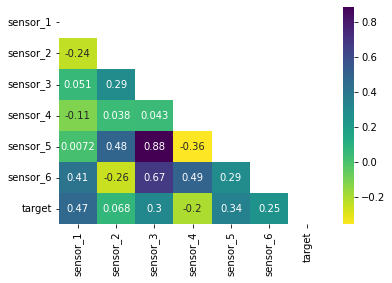

In [76]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(space_X_train.corr())

sns.heatmap(space_X_train.corr(), annot=True, cmap='viridis_r', mask=matrix)


From the previous graph it can be concluded that:
* Each class has a gaussian type distribution.
* The different labels form clusters for certain sensors.

There is no need to clean or engineer the Data set.

In [78]:
space_X_train['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [ ]:
space_X_train.columns

Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'target'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = space_X_train.drop('target',axis=1).values #returns a numpy array
numerical_cols=['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
space_X_train_min_max_scaled = pd.DataFrame(x_scaled)

scaler = preprocessing.RobustScaler()
space_X_train_robust = scaler.fit_transform(x)
space_X_train_robust = pd.DataFrame(space_X_train_robust, columns =numerical_cols)

scaler = preprocessing.StandardScaler()
space_X_train_standard = scaler.fit_transform(x)
space_X_train_standard = pd.DataFrame(space_X_train_standard, columns =numerical_cols)


In [ ]:
space_X_train_min_max_scaled ['target'] = space_X_train['target']
space_X_train_robust ['target'] = space_X_train['target']
space_X_train_standard ['target'] = space_X_train['target']


In [ ]:
space_X_train_scaled['target'] = space_X_train['target']

# Model screening

With Pycaret we test the dataframe with several models to check its performance with :

In [39]:
setup(space_X_train,
          target='target'
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7624,0.9427,0.7629,0.7681,0.7621,0.7030,0.7045,0.5650
lightgbm,Light Gradient Boosting Machine,0.7583,0.9407,0.7593,0.7611,0.7567,0.6979,0.6993,0.7000
et,Extra Trees Classifier,0.7535,0.9432,0.7541,0.7584,0.7526,0.6919,0.6935,0.5420
knn,K Neighbors Classifier,0.7433,0.9220,0.7441,0.7462,0.7420,0.6792,0.6804,0.1460
gbc,Gradient Boosting Classifier,0.7297,0.9352,0.7308,0.7350,0.7279,0.6622,0.6642,1.3740
dt,Decision Tree Classifier,0.6637,0.7896,0.6641,0.6702,0.6622,0.5795,0.5815,0.0360
nb,Naive Bayes,0.5657,0.8371,0.5671,0.5661,0.5505,0.4572,0.4632,0.0320
ada,Ada Boost Classifier,0.5364,0.8043,0.5413,0.5273,0.5188,0.4212,0.4266,0.1740
lr,Logistic Regression,0.5275,0.7885,0.5324,0.5076,0.5010,0.4103,0.4168,0.0490
qda,Quadratic Discriminant Analysis,0.5221,0.8452,0.5185,0.5784,0.5120,0.4008,0.4148,0.0290


In [14]:
space_X_train_scaled['target'] = space_X_train['target']

Let's try with the data modified with scalers: MinMaxScaler, RobustScaler, 

In [36]:
setup(space_X_train_min_max_scaled,
          target='target'
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7481,0.9380,0.7488,0.7532,0.7442,0.6852,0.6879,0.4620
rf,Random Forest Classifier,0.7468,0.9423,0.7473,0.7538,0.7434,0.6835,0.6864,0.5650
gbc,Gradient Boosting Classifier,0.7386,0.9386,0.7391,0.7419,0.7350,0.6733,0.6756,1.3590
et,Extra Trees Classifier,0.7386,0.9433,0.7393,0.7431,0.7351,0.6733,0.6758,0.4550
knn,K Neighbors Classifier,0.7229,0.9217,0.7234,0.7271,0.7207,0.6537,0.6556,0.1080
qda,Quadratic Discriminant Analysis,0.6515,0.8984,0.6526,0.6688,0.6431,0.5646,0.5716,0.0410
dt,Decision Tree Classifier,0.6439,0.7775,0.6441,0.6514,0.6423,0.5549,0.5572,0.0280
nb,Naive Bayes,0.5664,0.8384,0.5669,0.5722,0.5512,0.4581,0.4639,0.0280
lda,Linear Discriminant Analysis,0.5582,0.7955,0.5594,0.5438,0.5351,0.4481,0.4547,0.0250
ada,Ada Boost Classifier,0.5555,0.8152,0.5561,0.5460,0.5363,0.4444,0.4505,0.1680


In [37]:
setup(space_X_train_standard,
          target='target'
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7611,0.9425,0.7608,0.7642,0.7592,0.7013,0.7028,0.4670
lightgbm,Light Gradient Boosting Machine,0.7488,0.9407,0.7485,0.7523,0.7477,0.6860,0.6872,0.4050
rf,Random Forest Classifier,0.7468,0.9421,0.7465,0.7500,0.7447,0.6834,0.6850,0.5270
gbc,Gradient Boosting Classifier,0.7338,0.9363,0.7334,0.7378,0.7322,0.6672,0.6688,1.2010
knn,K Neighbors Classifier,0.7222,0.9226,0.7220,0.7277,0.7206,0.6528,0.6547,0.1040
dt,Decision Tree Classifier,0.6739,0.7963,0.6735,0.6767,0.6732,0.5924,0.5933,0.0370
qda,Quadratic Discriminant Analysis,0.5582,0.8626,0.5585,0.6060,0.5523,0.4479,0.4604,0.0360
nb,Naive Bayes,0.5555,0.8377,0.5541,0.5507,0.5386,0.4441,0.4496,0.0330
ada,Ada Boost Classifier,0.5534,0.8093,0.5520,0.5449,0.5412,0.4415,0.4447,0.1930
lr,Logistic Regression,0.5262,0.7925,0.5249,0.4987,0.4996,0.4075,0.4133,0.0540


In [38]:
setup(space_X_train_robust,
          target='target'
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7577,0.9422,0.7584,0.7628,0.7576,0.6970,0.6982,0.4650
rf,Random Forest Classifier,0.7563,0.9432,0.7572,0.7624,0.7561,0.6953,0.6968,0.6180
lightgbm,Light Gradient Boosting Machine,0.7427,0.9438,0.7435,0.7475,0.7423,0.6783,0.6796,0.4980
gbc,Gradient Boosting Classifier,0.7359,0.9367,0.7369,0.7390,0.7346,0.6698,0.6711,1.2910
knn,K Neighbors Classifier,0.7331,0.9233,0.7339,0.7394,0.7321,0.6663,0.6682,0.1300
dt,Decision Tree Classifier,0.6740,0.7960,0.6750,0.6772,0.6726,0.5924,0.5937,0.0380
qda,Quadratic Discriminant Analysis,0.5630,0.8507,0.5622,0.5819,0.5574,0.4533,0.4590,0.0270
nb,Naive Bayes,0.5582,0.8320,0.5603,0.5589,0.5445,0.4480,0.4532,0.0290
ada,Ada Boost Classifier,0.5446,0.7946,0.5479,0.5437,0.5302,0.4313,0.4368,0.1750
lr,Logistic Regression,0.5343,0.7932,0.5369,0.5118,0.5122,0.4182,0.4230,0.0560


In [27]:
setup(space_X_train_extra2,
          target='target'
    )
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7576,0.9460,0.7568,0.7603,0.7566,0.6969,0.6980,0.6190
et,Extra Trees Classifier,0.7529,0.9450,0.7519,0.7573,0.7521,0.6909,0.6922,0.5330
lightgbm,Light Gradient Boosting Machine,0.7481,0.9429,0.7470,0.7500,0.7466,0.6850,0.6861,0.6640
gbc,Gradient Boosting Classifier,0.7386,0.9404,0.7375,0.7423,0.7372,0.6730,0.6745,2.1870
knn,K Neighbors Classifier,0.7318,0.9227,0.7298,0.7374,0.7291,0.6643,0.6666,0.1330
dt,Decision Tree Classifier,0.6732,0.7958,0.6724,0.6773,0.6725,0.5914,0.5926,0.0270
nb,Naive Bayes,0.5773,0.8339,0.5739,0.5756,0.5579,0.4706,0.4767,0.0260
lr,Logistic Regression,0.5616,0.7984,0.5588,0.5558,0.5320,0.4512,0.4596,2.0800
lda,Linear Discriminant Analysis,0.5514,0.7942,0.5484,0.5435,0.5206,0.4383,0.4467,0.0360
ada,Ada Boost Classifier,0.5412,0.7974,0.5396,0.5347,0.5270,0.4259,0.4300,0.2780


## Random Forest Hyperparameters tunning with Optuna

In [ ]:
def scoring_f1(y_test,X_test,method): #generation of f1 macro
    f1score=f1_score(y_test,
                     method.predict(X_test),
                     average= 'macro'
)        
    return f1score  

In [81]:
import optuna

In [82]:
X=space_X_train.copy()
y=X.target
X.drop('target',axis=1, inplace=True)

In [83]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)
    
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = trial.suggest_int('max_depth', 1, 10000)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    n_jobs =  trial.suggest_int('n_jobs', 2, 20)
    
    rf_cl = RandomForestClassifier(bootstrap = bootstrap, 
                                   max_depth = max_depth, 
                                   max_features = max_features,
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


In [84]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2022-06-15 16:09:40,175] A new study created in memory with name: no-name-b676cb9d-ab97-4f3c-9782-61f5dec7064b
[I 2022-06-15 16:10:11,727] Trial 0 finished with value: 0.7080875621032325 and parameters: {'bootstrap': 'True', 'max_depth': 4234, 'max_features': 'sqrt', 'max_leaf_nodes': 3255, 'n_estimators': 260, 'n_jobs': 12}. Best is trial 0 with value: 0.7080875621032325.
[I 2022-06-15 16:10:17,622] Trial 1 finished with value: 0.7080737196939391 and parameters: {'bootstrap': 'False', 'max_depth': 8232, 'max_features': 'auto', 'max_leaf_nodes': 5276, 'n_estimators': 76, 'n_jobs': 6}. Best is trial 0 with value: 0.7080875621032325.
[I 2022-06-15 16:10:41,361] Trial 2 finished with value: 0.6887977785647073 and parameters: {'bootstrap': 'True', 'max_depth': 7869, 'max_features': 'log2', 'max_leaf_nodes': 2621, 'n_estimators': 142, 'n_jobs': 20}. Best is trial 0 with value: 0.7080875621032325.
[I 2022-06-15 16:11:09,277] Trial 3 finished with value: 0.7064266515857387 and parameters: 

In [85]:
import plotly.io as pio #To fix an issue with the renderer of graphs in VSC
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [86]:
pio.renderers.default = "notebook_connected"

In [87]:
optuna.visualization.plot_param_importances(study).show()

In [89]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [88]:
study.best_params

{'bootstrap': 'True',
 'max_depth': 4234,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3255,
 'n_estimators': 260,
 'n_jobs': 12}

In [90]:
# fix the less relevant parameter to continue the optimization
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    max_depth = trial.suggest_int('max_depth', 1, 10000)   
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    n_jobs =  trial.suggest_int('n_jobs', 2, 20)
    
    rf_cl = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = max_depth, 
                                   max_features = 'auto',
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


study.optimize(objective, n_trials=20)

[I 2022-06-15 16:16:23,875] Trial 20 finished with value: 0.7289288139398942 and parameters: {'max_depth': 2315, 'max_leaf_nodes': 9997, 'n_estimators': 646, 'n_jobs': 4}. Best is trial 20 with value: 0.7289288139398942.
[I 2022-06-15 16:16:40,953] Trial 21 finished with value: 0.7168550195664298 and parameters: {'max_depth': 1919, 'max_leaf_nodes': 9940, 'n_estimators': 703, 'n_jobs': 4}. Best is trial 20 with value: 0.7289288139398942.
[I 2022-06-15 16:16:58,237] Trial 22 finished with value: 0.7114041359991466 and parameters: {'max_depth': 2195, 'max_leaf_nodes': 9730, 'n_estimators': 777, 'n_jobs': 4}. Best is trial 20 with value: 0.7289288139398942.
[I 2022-06-15 16:17:14,379] Trial 23 finished with value: 0.7212584405641096 and parameters: {'max_depth': 2016, 'max_leaf_nodes': 9957, 'n_estimators': 759, 'n_jobs': 4}. Best is trial 20 with value: 0.7289288139398942.
[I 2022-06-15 16:17:35,767] Trial 24 finished with value: 0.72495030433658 and parameters: {'max_depth': 112, 'max_l

In [91]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [92]:
optuna.visualization.plot_param_importances(study).show()

In [93]:
study.best_params

{'max_depth': 2511, 'max_leaf_nodes': 9249, 'n_estimators': 610, 'n_jobs': 2}

In [94]:
# fix the less relevant parameter to continue the optimization
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    max_depth = trial.suggest_int('max_depth', 1, 10000)   
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 4000, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 100, 1000)
    n_jobs =  trial.suggest_int('n_jobs', 18, 25)
    
    rf_cl = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = max_depth, 
                                   max_features = 'auto',
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


study.optimize(objective, n_trials=20)

[I 2022-06-15 16:23:25,011] Trial 40 finished with value: 0.715241083956389 and parameters: {'max_depth': 1530, 'max_leaf_nodes': 9690, 'n_estimators': 666, 'n_jobs': 18}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:23:57,215] Trial 41 finished with value: 0.6057252386922045 and parameters: {'max_depth': 3, 'max_leaf_nodes': 9703, 'n_estimators': 984, 'n_jobs': 21}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:24:25,480] Trial 42 finished with value: 0.708626515176803 and parameters: {'max_depth': 508, 'max_leaf_nodes': 9748, 'n_estimators': 889, 'n_jobs': 21}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:24:46,434] Trial 43 finished with value: 0.7176357549992615 and parameters: {'max_depth': 1087, 'max_leaf_nodes': 9658, 'n_estimators': 744, 'n_jobs': 19}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:25:18,013] Trial 44 finished with value: 0.7124736951738859 and parameters: {'max_depth': 496, 'max_l

In [95]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [98]:
optuna.visualization.plot_param_importances(study).show()

In [99]:
study.best_params

{'max_depth': 2511, 'max_leaf_nodes': 9249, 'n_estimators': 610, 'n_jobs': 2}

In [100]:
# fix the less relevant parameter to continue the optimization
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    max_depth = trial.suggest_int('max_depth', 4000, 8000)   
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 4000, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 100, 1000)
    n_jobs =  trial.suggest_int('n_jobs', 20, 25)
    
    rf_cl = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = max_depth, 
                                   max_features = 'auto',
                                   max_leaf_nodes = max_leaf_nodes,
                                   n_estimators = n_estimators,
                                   n_jobs = n_jobs
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


study.optimize(objective, n_trials=20)

[I 2022-06-15 16:30:45,243] Trial 60 finished with value: 0.7127424773414134 and parameters: {'max_depth': 4007, 'max_leaf_nodes': 9591, 'n_estimators': 500, 'n_jobs': 25}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:31:05,707] Trial 61 finished with value: 0.7133252413584931 and parameters: {'max_depth': 4026, 'max_leaf_nodes': 9966, 'n_estimators': 693, 'n_jobs': 25}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:31:24,286] Trial 62 finished with value: 0.7183957354461384 and parameters: {'max_depth': 4007, 'max_leaf_nodes': 9867, 'n_estimators': 645, 'n_jobs': 24}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:31:43,161] Trial 63 finished with value: 0.7164427292692183 and parameters: {'max_depth': 4000, 'max_leaf_nodes': 9804, 'n_estimators': 631, 'n_jobs': 25}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:32:07,774] Trial 64 finished with value: 0.7129071344404643 and parameters: {'max_depth': 4005,

In [101]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [102]:
optuna.visualization.plot_param_importances(study).show()

In [107]:
study.best_params

{'max_depth': 2511, 'max_leaf_nodes': 9249, 'n_estimators': 610, 'n_jobs': 2}

In [108]:
# fix the less relevant parameter to continue the optimization
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
  
    n_jobs =  trial.suggest_int('n_jobs', 18, 25)
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
        
    rf_cl = RandomForestClassifier(bootstrap = bootstrap, 
                                   max_depth = 2511, 
                                   max_features =  max_features,
                                   max_leaf_nodes = 9249,
                                   n_estimators = 610,
                                   n_jobs = n_jobs
                                  )
    
    rf_cl.fit(X_train, y_train)
    y_pred = rf_cl.predict(X_test)
    
    score = cross_val_score(rf_cl, X_test, y_test, cv=5, scoring="f1_macro")
    f1_mean = score.mean()

    return f1_mean


study.optimize(objective, n_trials=20)

[I 2022-06-15 16:45:30,475] Trial 100 finished with value: 0.715115923742757 and parameters: {'n_jobs': 21, 'bootstrap': 'True', 'max_features': 'log2'}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:45:49,600] Trial 101 finished with value: 0.7130841598915711 and parameters: {'n_jobs': 22, 'bootstrap': 'True', 'max_features': 'log2'}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:46:09,602] Trial 102 finished with value: 0.7102002946288456 and parameters: {'n_jobs': 23, 'bootstrap': 'True', 'max_features': 'log2'}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:46:33,617] Trial 103 finished with value: 0.7116675464350266 and parameters: {'n_jobs': 22, 'bootstrap': 'True', 'max_features': 'log2'}. Best is trial 27 with value: 0.7316477529736984.
[I 2022-06-15 16:46:54,047] Trial 104 finished with value: 0.7138847991049481 and parameters: {'n_jobs': 21, 'bootstrap': 'True', 'max_features': 'log2'}. Best is trial 27 with value: 0

In [110]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [120]:
study.best_params

{'max_depth': 2511, 'max_leaf_nodes': 9249, 'n_estimators': 610, 'n_jobs': 2}

## Neuronal Network Hyperparameters tunning with Optuna

In [38]:
import torch

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels=list(df.target)
        self.features = df.drop(columns=['target'], axis=1).values.tolist()

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_features(self, idx):
        return np.array(self.features[idx])

    def __getitem__(self, idx):
        batch_features = self.get_batch_features(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_features, batch_y

In [56]:
def build_model(params):
    
    in_features = 6 #number of features, it can be changed if new columns added
    
    return nn.Sequential(
    
        nn.Linear(in_features, params['n_unit']),
        nn.LeakyReLU(),
        nn.Linear(params['n_unit'], 2),
        nn.LeakyReLU()
        
    )

In [57]:
 
# Train and evaluate the accuarcy of neural network model
def train_and_evaluate(param, model):
        
    train_data, val_data = train_test_split(space_X_train, test_size = 0.2, random_state = 42)
    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=4)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = getattr(optim, param['optimizer'])(model.parameters(), lr= param['learning_rate'])

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(EPOCHS):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in train_dataloader:

                train_label = train_label.to(device)
                train_input = train_input.to(device)

                output = model(train_input.float())
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                f1macro= f1_score(train_label, 
                            output.argmax(dim=1), 
                            average = 'macro'
                            )
                              
                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    val_input = val_input.to(device)

                    output = model(val_input.float())

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            #accuracy = total_acc_val/len(val_data)
            f1macro= f1_score(val_label, 
                            output.argmax(dim=1), 
                            average = 'macro'
                            )

                             
            # Add prune mechanism
            trial.report(f1macro, epoch_num)

            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()
            

    return f1macro
  


In [58]:
 # Define a set of hyperparameter values, build the model, train the model, and evaluate the f1 score
  
def objective(trial):

     params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
              'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"]),
              'n_unit': trial.suggest_int("n_unit", 4, 18)
              }
    
     model = build_model(params)
    
     f1macro = train_and_evaluate(params, model)

     return f1macro

In [59]:

EPOCHS = 30
    
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=5)

[I 2022-06-15 10:29:39,138] A new study created in memory with name: no-name-32321a87-a557-497b-adb9-d3a40a51355e
[W 2022-06-15 10:29:39,159] Trial 0 failed because of the following error: IndexError('Target 2 is out of bounds.')
Traceback (most recent call last):
  File "c:\Users\march\anaconda3\envs\EDA_i_ML_37\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\march\AppData\Local\Temp\ipykernel_27696\3270901931.py", line 13, in objective
    f1macro = train_and_evaluate(params, model)
  File "C:\Users\march\AppData\Local\Temp\ipykernel_27696\1956750662.py", line 33, in train_and_evaluate
    batch_loss = criterion(output, train_label.long())
  File "c:\Users\march\anaconda3\envs\EDA_i_ML_37\lib\site-packages\torch\nn\modules\module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "c:\Users\march\anaconda3\envs\EDA_i_ML_37\lib\site-packages\torch\nn\modules\loss.py", line 1165, in forw

IndexError: Target 2 is out of bounds.

In [28]:
def detailed_objective(trial):
    # Use same code objective to reproduce the best model
    X, y = make_classification(n_features=10, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    C = trial.suggest_loguniform("C", 1e-7, 10.0)
    clf = LogisticRegression(C=C)
    clf.fit(X_train, y_train)
    # calculate more evaluation metrics
    pred = clf.predict(X_test)
    acc = metrics.accuracy_score(pred, y_test)
    recall = metrics.recall_score(pred, y_test)
    precision = metrics.precision_score(pred, y_test)
    f1 = metrics.f1_score(pred, y_test)
    return acc, f1, recall, precision


In [342]:
param_test1 = {'n_estimators':range(20,300,10)}
gsearch1 = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = param_test1, 
                        n_jobs = 4, 
                        cv = 5,
                        verbose = 4,
)

gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   45.5s
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [343]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 240}, 0.689068136145903)

In [351]:
scoring_f1(y_test,X_test,gsearch1)

0.7137069661061817

In [345]:
param_test2 = {'n_estimators':[240], 'criterion': ['gini', 'entropy', 'log_loss']}
gsearch2 = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = param_test2, 
                        n_jobs = 4, 
                        cv = 5,
                        verbose = 4,
)

gsearch2.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:   16.7s remaining:    4.1s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   18.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [346]:
gsearch2.best_params_, gsearch2.best_score_

({'criterion': 'entropy', 'n_estimators': 240}, 0.6879447934176766)

In [350]:
scoring_f1(y_test,X_test,gsearch2)

0.7126813595129133

In [352]:
param_test3 = {'n_estimators':[240], 'criterion': ['entropy']}
gsearch3 = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = param_test3, 
                        n_jobs = 4, 
                        cv = 5,
                        verbose = 4,
)

gsearch3.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   13.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

## test_X prediction

To take advantage of all the dataset, the model with the best hyperparameters is fitted with the whole train data:

In [121]:
best_final_model = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = 2511, 
                                   max_features =  'auto',
                                   max_leaf_nodes = 9249,
                                   n_estimators = 610,
                                   n_jobs = 2                       
                                   )

In [125]:
X_final=space_X_train.copy()
X_final.drop('target', axis=1,inplace=True)
y_final = space_X_train.target

In [126]:
X_final

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490
...,...,...,...,...,...,...
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569


In [127]:
best_final_model.fit(X_final,y_final)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2511, max_features='auto',
                       max_leaf_nodes=9249, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=610, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Charge test_X dataset to be predicted. We check its statistically ressemblance to the training data set.:

In [117]:
test_x=pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\initial_docs\space_X_test.csv',index_col=None)

test_x.isnull().sum()

Unnamed: 0    0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
dtype: int64

In [118]:
test_x.shape

(900, 7)

In [119]:
test_x.drop('Unnamed: 0', axis=1, inplace=True)
test_x.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953


In [128]:
x_test_pred = best_final_model.predict(test_x)
x_test_pred

array([1, 3, 2, 0, 3, 2, 4, 0, 2, 3, 1, 4, 1, 1, 4, 4, 4, 3, 2, 0, 1, 2,
       4, 0, 0, 3, 0, 2, 2, 4, 2, 2, 4, 3, 3, 1, 0, 4, 3, 0, 4, 2, 3, 2,
       2, 0, 0, 1, 2, 4, 4, 0, 2, 0, 4, 4, 1, 3, 3, 0, 3, 0, 3, 0, 4, 1,
       1, 0, 2, 3, 0, 1, 4, 0, 4, 0, 0, 1, 2, 3, 4, 3, 1, 3, 1, 1, 2, 3,
       1, 2, 2, 4, 1, 1, 0, 1, 4, 2, 0, 4, 0, 0, 0, 4, 2, 4, 4, 4, 1, 2,
       4, 1, 3, 3, 3, 2, 1, 4, 2, 2, 0, 4, 4, 3, 1, 2, 4, 1, 3, 2, 2, 1,
       4, 0, 0, 2, 3, 0, 0, 4, 0, 4, 3, 2, 1, 3, 4, 3, 4, 4, 1, 2, 1, 2,
       0, 4, 2, 4, 4, 2, 0, 2, 3, 1, 1, 4, 0, 3, 2, 0, 1, 2, 4, 4, 1, 2,
       3, 0, 3, 4, 2, 1, 0, 2, 2, 2, 0, 3, 4, 1, 1, 1, 2, 4, 0, 0, 4, 4,
       1, 2, 0, 2, 4, 3, 2, 2, 3, 1, 1, 3, 0, 0, 2, 1, 1, 3, 4, 2, 2, 1,
       2, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 2, 4, 3, 2, 4, 0, 3, 3, 3, 0, 4,
       3, 0, 2, 0, 2, 1, 2, 0, 2, 3, 1, 3, 1, 1, 0, 3, 2, 4, 2, 1, 0, 2,
       2, 4, 2, 4, 1, 2, 1, 4, 2, 0, 3, 0, 1, 4, 2, 4, 1, 1, 2, 1, 1, 4,
       0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 4, 4, 1, 4, 0,

In [136]:
predictions_df=pd.DataFrame(x_test_pred,columns=['final_status'])
predictions_df

,final_status
0,1
1,3
2,2
3,0
4,3
...,...
895,3
896,4
897,0
898,3


In [137]:

predictions_df.to_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\predictions.csv',index=False)